# Recommending A Crop Using Machine Learning

This notebook will introduce some foundation machine learning and data science concepts by exploring the problem of crop recommendation **classification**.


## What is classification?

Classification involves deciding whether a sample is part of one class or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification**.

## What we'll end up with

Since we already have a dataset, we'll approach the problem by keeping the following topics in our mind.

* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're recommending a crop, are there some things which are more important for prediction?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

We'll work through each step and by the end of the notebook, we'll have a handful of models, all which can predict whether or not a person has heart disease based on a number of different parameters at a considerable accuracy. 

We will also describe which parameters are more indicative than others, for example, rainfall may be more important than temperature.

## 1. Problem Definition
In our case, the problem we will be exploring is **multiclass classification** (A classification task with more than two classes). 

This is because we're going to be using a number of differnet **features** (pieces of information) about a farm to recommend a crop which will be best suited for that farm

In a statement,

> Given clinical parameters about a farm, can we recommend a best suited crop for that farm?

## 2. Data

What we want to do here is dive into the data our problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

We've downloaded this data in a formatted way from [Kaggle](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset).

This dataset contains only 7 attributes. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a different attributes related to a farm and the dependent variable what type of crop is suitable for a given farm.


## 3. Evaluation

The evaluation metric is something we want to define at the start of a project.

Since machine learning is very experimental, we can say something like, 

> If we can reach 90% accuracy at predicting suitable crop for a given farm during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features

Features are different parts of the data. During this step, we will start finding out what we can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### Crop Recommendation Data Dictionary

A data dictionary describes the data we are dealing with. Not all datasets come with them so this is where we have to do our research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (suitable crop for a farm).

1. N - ratio of Nitrogen content in soil
2. P - ratio of Phosphorous content in soil
3. K - ratio of Potassium content in soil
4. temperature - temperature in degree Celsius
5. humidity - relative humidity in %
6. ph - ph value of the soil
7. rainfall - rainfall in mm
8. label - type of crop recommended for a given farm 
    ('rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
      'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
      'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
      'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee') (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

## Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk.

The libraries we use will differ from project to project. But there are a few which we can take advantage of during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [7]:
# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

There are many different kinds of ways to store data. The typical way of storing **tabular data**, data similar to what you'd see in an Excel file is in `.csv` format. `.csv` stands for comma seperated values.

Pandas has a built-in function to read `.csv` files called `read_csv()` which takes the file pathname of your `.csv` file.

In [8]:
df = pd.read_csv("../data/raw/Crop_recommendation.csv");
df.shape # (rows, columns)

(2200, 8)

## Data Exploration (exploratory data analysis or EDA)

Once we have imported a dataset, the next step is to explore. There's no set way of doing this. But what we would be trying to do is become more and more familiar with the dataset.

Compare different columns to each other, compare them to the label variable. Refer back to our **data dictionary** and remind ourself of what different columns mean.

Our goal is to become a subject matter expert on the dataset we are working with. So if someone asks us a question about it, we can give them an explanation and when we start building models, we can sound check them to make sure they're not performing too well (**overfitting**) or why they might be performing poorly (**underfitting**).

Since EDA has no real set methodolgy, the following is a short check list we would want to walk through:

1. What question(s) are we trying to solve (or prove wrong)?
2. What kind of data do we have and how do we treat different types?
3. What’s missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

Once of the quickest and easiest ways to check your data is with the `head()` function. Calling it on any dataframe will print the top 5 rows, `tail()` calls the bottom 5. You can also pass a number to them like `head(10)` to show the top 10 rows.


In [9]:
# Let's check the top 5 rows of our dataframe
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
# Let's check the bottom 5 rows of our dataframe
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


`value_counts()` allows you to show how many times each of the values of a **categorical** column appear.

In [15]:
# Let's see how many samples we have in our dataframe for different types of crops
df.label.value_counts()

lentil         100
grapes         100
cotton         100
blackgram      100
coffee         100
orange         100
mango          100
maize          100
coconut        100
apple          100
papaya         100
mothbeans      100
chickpea       100
jute           100
rice           100
kidneybeans    100
pomegranate    100
watermelon     100
muskmelon      100
mungbean       100
pigeonpeas     100
banana         100
Name: label, dtype: int64

Since these 22 values of different crops are having same frequency, our `label` column can be considered **balanced**. An **unbalanced** target column, meaning some classes have far more samples, can be harder to model than a balanced set. Ideally, all of our target classes have the same number of samples.

If we would prefer these values in percentages, `value_counts()` takes a parameter, `normalize` which can be set to true.

In [16]:
# Let's see how many samples we have in our dataframe for different types of crops
df.label.value_counts(normalize=True)

lentil         0.045455
grapes         0.045455
cotton         0.045455
blackgram      0.045455
coffee         0.045455
orange         0.045455
mango          0.045455
maize          0.045455
coconut        0.045455
apple          0.045455
papaya         0.045455
mothbeans      0.045455
chickpea       0.045455
jute           0.045455
rice           0.045455
kidneybeans    0.045455
pomegranate    0.045455
watermelon     0.045455
muskmelon      0.045455
mungbean       0.045455
pigeonpeas     0.045455
banana         0.045455
Name: label, dtype: float64

We can plot the target column value counts by calling the `plot()` function and telling it what kind of plot we'd like, in this case, bar is good.

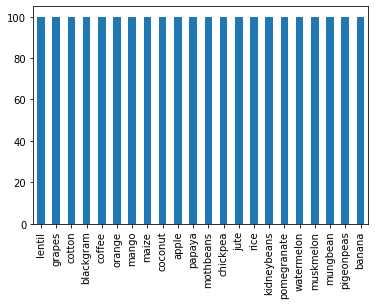

In [21]:
# Plot the value counts with a bar graph
df.label.value_counts().plot(kind="bar");

`df.info()` shows a quick insight to the number of missing values you have and what type of data your working with.

In our case, there are no missing values and all of our columns are numerical in nature.

In [23]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


Another way to get some quick insights on our dataframe is to use `df.describe()`. `describe()` shows a range of different metrics about our numerical columns such as mean, max and standard deviation.

In [24]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


Let's check the age **distribution**.

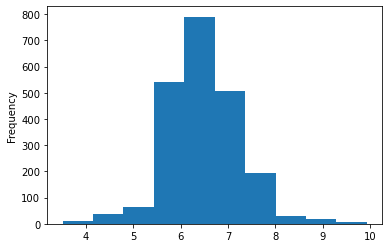

In [27]:
# Histograms are a great way to check the distribution of a variable
df.ph.plot.hist();

We can see it's a [**normal distribution**](https://en.wikipedia.org/wiki/Normal_distribution)

### Correlation between independent variables

Finally, we'll compare all of the independent variables in one hit.

Why?

Because this may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using `df.corr()` which will create a [**correlation matrix**](https://www.statisticshowto.datasciencecentral.com/correlation-matrix/) for us, in other words, a big table of numbers telling us how related each variable is the other.

In [28]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


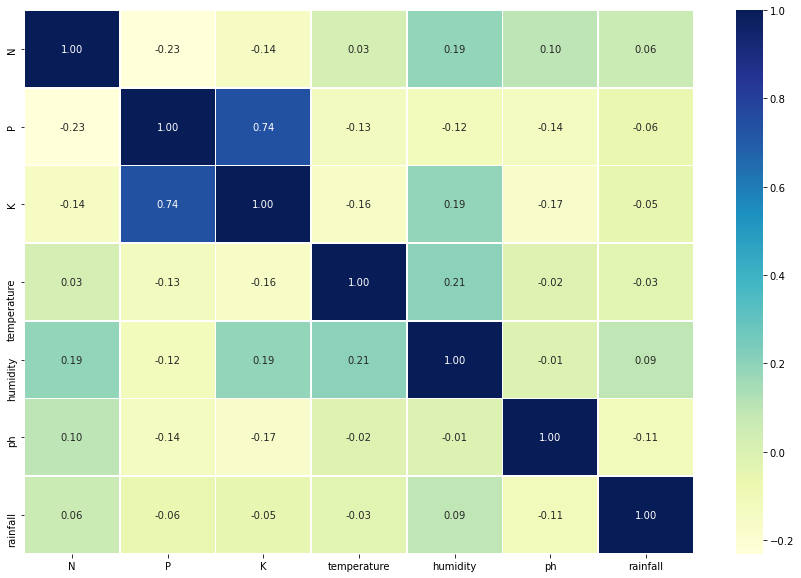

In [29]:
# Let's make it look a little prettier
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).